# WORDLE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tqdm import tqdm as ProgressDisplay
import math

### Lecture des fichiers de mots de 5 lettres

In [5]:
# mots_1 = pd.read_json("mots.json")
# mots = pd.read_table("mots.txt",header=None) #version science etonnante
mots = pd.read_json("mots_off.json") #officielle depuis loane
words = pd.read_json("wordle_us.json")
data = mots.copy()
# alphabet= np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
# alphabet= np.array(list('abcdefghijklmnopqrstuvwxyz'))
# frequence = {}
# for l in alphabet:
#     frequence[l]=0
# data.shape
dimension = data.size
print(dimension)

6025


### Convertir un array en string

In [6]:
def convert_array_mot(arr):
    return np.array([''.join(chr(e) for e in ligne )for ligne in arr])

* test de la fonction 

In [7]:
liste = np.array([[101, 97, 116, 110, 97],[101, 97, 116, 110, 97]])
print(liste)
retour_mots = convert_array_mot(liste)
print(retour_mots)

[[101  97 116 110  97]
 [101  97 116 110  97]]
['eatna' 'eatna']


### Convertir une string en array

In [8]:
def convert_mot_array(mots):
    return np.array([[ord(c)for c in w] for w in mots], dtype=np.uint8)

In [9]:
mots_array = convert_mot_array(data[0])
mots_array.shape


(6025, 5)

In [10]:
words_array = convert_mot_array(words[0])
words_array.shape

(12947, 5)

## Algorithm principal
 qui renvoie les options valides pour un mot, une pattern et une liste de mots
 * check : mot à tester
 * pattern : la pattern de type '01120'
 * M : le dictionnaire de mots

In [11]:
def check_mot_pattern(check,pattern,M=mots_array.copy(),k=5):
    # M = mots_array.copy()
    cnt = M.shape[0]
    for n in range(k):
        c =ord(check[n])
        if (pattern[n]=='0'):
            # for i in range(k):
            #     M = M[~(M[:,i] == c)]
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] == 0)]
            M = np.delete(M,0,axis=1)
        elif (pattern[n]=='2'):
            M = M[(M[:,n] == c)]
        else: # (pattern[n]=='1'):
            M = M[~(M[:,n] == c)] # on elimine la bonne postion
            # P = (M[:] == c)
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            # T = (np.sum(P[:], axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] > 0)]
            M = np.delete(M,0,axis=1)
    return M,M.shape[0]

In [56]:
c = data[0][:100].copy()
print(c)
for m in ProgressDisplay(c):
    a,b = entropie_mot(m)

0     COMME
1     CETTE
2     AUSSI
3     AUTRE
4     FAIRE
      ...  
95    PIEDS
96    GARDE
97    BLANC
98    DEBUT
99    BRUIT
Name: 0, Length: 100, dtype: object


  0%|          | 0/100 [00:00<?, ?it/s]


TypeError: list indices must be integers or slices, not str

In [13]:
M=mots_array.copy()
# print(M)
c=ord('E')
print(c,M.shape)
# print(M[~(M[:] == c)].shape)
P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
M = np.insert(M,0,P,axis=1)
M = M[(M[:,0] == 0)]
M = np.delete(M,0,axis=1)
print(M.shape,M)


69 (6025, 5)
(2438, 5) [[65 85 83 83 73]
 [81 85 65 78 68]
 [65 76 79 82 83]
 ...
 [81 85 73 80 85]
 [72 73 78 68 73]
 [83 76 65 78 71]]


In [14]:
ret = mots_array.copy()
ret, nb = check_mot_pattern('RIMES','00100',ret)
if (nb>0):
    entropie = -math.log(nb/dimension)/math.log(2)
else:
    entropie=0
print(nb,dimension,entropie,convert_array_mot(ret))

55 6025 6.775385812480026 ['CHAMP' 'AMANT' 'PLOMB' 'ALBUM' 'MATCH' 'AMONT' 'MACON' 'MAGMA' 'MATOU'
 'MAGOT' 'MOULT' 'MATON' 'MOLLO' 'MOULU' 'MULLA' 'TAXUM' 'MANUL' 'LOUMA'
 'XALAM' 'MAQAM' 'MANOU' 'MANTA' 'MUNDA' 'MUNGO' 'OGHAM' 'MULCH' 'MANON'
 'MANAT' 'MYTHO' 'CLAMP' 'NDAMA' 'FANUM' 'MODAL' 'MALON' 'MAZOT' 'MANGA'
 'FATMA' 'MULOT' 'MACHO' 'MOGOL' 'FATUM' 'MATAF' 'MACHA' 'MUANT' 'BLOOM'
 'MOLTO' 'MANDA' 'CAVUM' 'DOUMA' 'PLUMA' 'MOULA' 'MULON' 'MOUND' 'AMBON'
 'MANGO']


In [15]:
def lettre_in(lettre,mot):
    return mot.find(lettre) 

## Creation de la pattern globale pour l'ensemble de 243 permutations (3^5)

In [16]:
def make_pattern(p=5):
    pattern=[]
    for k in range(pow(3,5)):
        if (k<1):
            pattern.append(np.base_repr(k,3,5))
        elif (k<3):
            pattern.append(np.base_repr(k,3,4))
        elif (k<9):
            pattern.append(np.base_repr(k,3,3))
        elif (k<27):
            pattern.append(np.base_repr(k,3,2))
        elif (k<81):
            pattern.append(np.base_repr(k,3,1))
        else:
            pattern.append(np.base_repr(k,3))
    return pattern

In [17]:
pattern = make_pattern(5)

## Calcul de l'Entropie

In [18]:
def log2_(val,div):
    return math.log2(div/val) if val >0 else 0

In [57]:
def entropie_mot(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern(check,p,M)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
    return e_sum,e_pattern


2.8784707585528073


<BarContainer object of 243 artists>

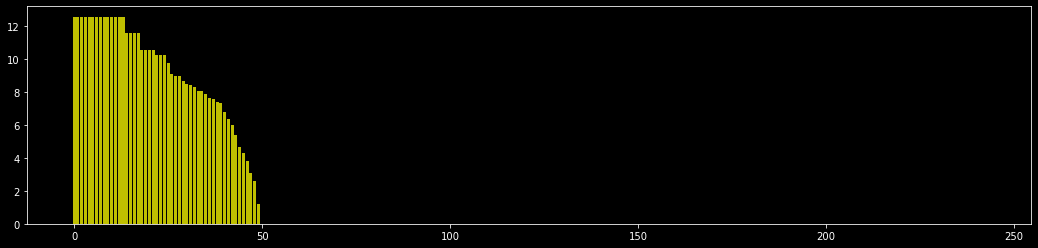

In [20]:
e, e_p = entropie_mot('ZXRTK')
print(e)
gr = np.sort(e_p)[::-1]
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')

# Calcul initial

Cela permet de déterminer dans 'liste_entropie' l'entropie de tous les mots dans le dictionnaire

L'entropie c'est : E = - log(p)/log(2)
ou p est la probabilité


In [22]:
# initialement 9m05s ... maintenat 12:50 avec 6025 mots
liste_entropie = {}
for mot in ProgressDisplay(data[0]):
    liste_entropie[mot] = entropie_mot(mot)
liste_entropie = sorted(liste_entropie.items(), key=lambda x: x[1],reverse=True)

100%|██████████| 6025/6025 [23:23<00:00,  4.29it/s]   


In [25]:
h = liste_entropie[:10]

## Aide au jeux
temps initial = 6,6s

Nous proposons RIMES
et calculons au préalable sont Entropie = 5,71971

nous jouons pour obtenir un résultat ⬛⬛🟨⬛⬛ soit '00100'

au final l'Entropie de ce choix est de 6,775 puisqu'il nous reste plus que 55 possibilités


In [26]:
E, E_detail = entropie_mot('RIMES')
print("Entropie de 'RIMES' = ",E)
ret,e = check_mot_pattern('RIMES','00100')
# print(pattern.index('00100')) marche pas car retrié !!!
print("Entropie si pattern='00100' ",math.log2(dimension/e))


Entropie de 'RIMES' =  5.719713732680308
Entropie si pattern='00100'  6.775385812480026


In [27]:
def conseil(check,pattern,M=mots_array.copy()):
    ret, nb = check_mot_pattern(check,pattern,M)
    E = - math.log(nb/M.shape[0])/math.log(2)
    new_liste = convert_array_mot(ret)
    # print(nb, E)
    new_entropie = {}
    for mot in ProgressDisplay(new_liste):
        new_entropie[mot] = entropie_mot(mot,ret)
    # print(f'Test : {new_entropie}')
    return(list(new_entropie))

In [28]:
# 
ret, nb = check_mot_pattern('MOULE','00001',mots_array.copy())
E = - math.log(nb/dimension)/math.log(2)
new_liste = convert_array_mot(ret)
print(nb, E)
new_entropie = {}
for mot in ProgressDisplay(new_liste):
    new_entropie[mot] = entropie_mot(mot,ret)
new_entropie = sorted(new_entropie.items(), key=lambda x: x[1],reverse=True)


682 3.1431175969805145


100%|██████████| 682/682 [00:21<00:00, 32.39it/s]


In [58]:
print(dimension,ret.shape)
# print(f'Test : {new_entropie[:20]}')

AttributeError: 'tuple' object has no attribute 'shape'

In [30]:
# ret=mots_array.copy()
dim = ret.shape[0]
ret, nb = check_mot_pattern('PARTE','02101',ret)
print(nb)
E = - math.log(nb/dim)/math.log(2)
new_liste = convert_array_mot(ret)
print(nb, dim, E,new_liste)

31
31 682 4.459431618637297 ['RACES' 'RAIES' 'NAGER' 'RASER' 'RASES' 'BAVER' 'CASER' 'RAYES' 'RAYER'
 'RADES' 'FAXER' 'BADER' 'RADER' 'HAVER' 'RAVER' 'GAVER' 'RAVES' 'RAGES'
 'FANER' 'BAYER' 'JASER' 'BASER' 'FADER' 'CANER' 'RAGER' 'GAZER' 'RACER'
 'GAGER' 'VASER' 'CAVER' 'RABES']


# Simulation de jeux

* data[0] : liste de mots du dictionnaire
* mots_array : tableau des mots

In [31]:
def test_mot(check,ref,k=5):
    rep=np.array([0,0,0,0,0])
    for i in range(k):
        if (check[i]==ref[i]):
            rep[i]=2
        else:
            if (lettre_in(check[i],ref) == -1):
                rep[i] = 0
            else:
                rep[i] = 1
    return rep

In [32]:
def affiche_score(arr,k=5):
    rep=''
    for i in range(k):
        if (arr[i]==2):
            rep = rep + '🟩'
        if (arr[i]==1):
            rep = rep + '🟨'
        if (arr[i]==0):
            rep = rep + '⬛'
    return rep

In [33]:
def tire_sort():
    ret = np.random.choice(data[0])
    return ret

In [34]:
secret = tire_sort()
print('le mot secret est : ',secret)

le mot secret est :  HAVIE


In [35]:
first='ORVET'
rep = test_mot(first,secret)
print (affiche_score(rep))

⬛⬛🟩🟨⬛


In [36]:
ret, nb = check_mot_pattern(first,'10001',mots_array.copy())
# convert_array_mot(ret)

In [37]:
ret = check_mot_pattern('ORVET','00000')
print(ret)

(array([[65, 85, 83, 83, 73],
       [81, 85, 65, 78, 68],
       [65, 73, 78, 83, 73],
       ...,
       [81, 85, 73, 80, 85],
       [72, 73, 78, 68, 73],
       [83, 76, 65, 78, 71]], dtype=uint8), 629)


In [38]:
def toStr(arr):
    ret = ''
    for c in arr:
        ret = ret + str(c)
    return ret

In [39]:
rep = test_mot('TOITS',secret)
print(toStr(rep))
affiche_score(rep)

00100


'⬛⬛🟨⬛⬛'

In [40]:
conseil('AIRES','11001')

100%|██████████| 26/26 [00:00<00:00, 43.07it/s]


['SAINT',
 'QUASI',
 'SAISI',
 'ISLAM',
 'SAPIN',
 'SATIN',
 'MASAI',
 'NASHI',
 'SAKTI',
 'SHIBA',
 'FASSI',
 'LASSI',
 'SWAZI',
 'GASPI',
 'SAIGA',
 'SAMIT',
 'LAPSI',
 'DASHI',
 'SABIN',
 'SALIN',
 'SAHIB',
 'BASIC',
 'SPAHI',
 'BASIN',
 'SPICA',
 'SAMPI']

In [41]:
data[0].searchsorted('MOULE')

2004

In [42]:
#simuler un jeu
def simul():
    secret = tire_sort()
    propal = 'RAIES' #plus forte Entropie
    filtre = mots_array.copy() # init avec tous le dictionnaire
    iter=0
    while (propal != secret):
        reponse = test_mot(propal,secret) # plus forte entropie
        filtre,nb = check_mot_pattern(propal,toStr(reponse),filtre)
        propal = conseil(propal,toStr(reponse),filtre)[0]
        print(iter, propal, secret, affiche_score(reponse))
        iter = iter +1
    return iter

In [43]:
jeux=np.array((0))
print(jeux)
for i in range(5):
    jeux = np.append(jeux,simul())
print('Moyenne des succès :',jeux.mean(axis=0))

0


100%|██████████| 48/48 [00:01<00:00, 42.63it/s]


0 ALORS OKRAS 🟨🟨⬛⬛🟩


100%|██████████| 5/5 [00:00<00:00, 42.21it/s]


1 PRAOS OKRAS 🟨⬛🟨🟨🟩


100%|██████████| 4/4 [00:00<00:00, 35.06it/s]


2 OMRAS OKRAS ⬛🟨🟨🟨🟩


100%|██████████| 1/1 [00:00<00:00, 34.26it/s]


3 OKRAS OKRAS 🟩⬛🟩🟩🟩


100%|██████████| 103/103 [00:02<00:00, 40.21it/s]


0 TEMPS LOESS ⬛⬛⬛🟨🟩


100%|██████████| 23/23 [00:00<00:00, 43.03it/s]


1 CHEFS LOESS ⬛🟨⬛⬛🟩


100%|██████████| 10/10 [00:00<00:00, 41.36it/s]


2 QUELS LOESS ⬛⬛🟩⬛🟩


100%|██████████| 3/3 [00:00<00:00, 35.01it/s]


3 GLEYS LOESS ⬛⬛🟩🟨🟩


100%|██████████| 1/1 [00:00<00:00, 30.32it/s]


4 LOESS LOESS ⬛🟨🟩⬛🟩


100%|██████████| 221/221 [00:05<00:00, 38.65it/s]


0 ENTRE MORVE 🟨⬛⬛🟨⬛


100%|██████████| 80/80 [00:01<00:00, 42.23it/s]


1 FORME MORVE 🟨⬛⬛🟨🟩


100%|██████████| 4/4 [00:00<00:00, 39.31it/s]


2 MORUE MORVE ⬛🟩🟩🟨🟩


100%|██████████| 3/3 [00:00<00:00, 42.16it/s]


3 MORCE MORVE 🟩🟩🟩⬛🟩


100%|██████████| 2/2 [00:00<00:00, 37.03it/s]


4 MORGE MORVE 🟩🟩🟩⬛🟩


100%|██████████| 1/1 [00:00<00:00, 35.22it/s]


5 MORVE MORVE 🟩🟩🟩⬛🟩


100%|██████████| 145/145 [00:03<00:00, 41.02it/s]


0 VINGT LIPPU ⬛⬛🟨⬛⬛


100%|██████████| 21/21 [00:00<00:00, 43.34it/s]


1 HIPPO LIPPU ⬛🟩⬛⬛⬛


100%|██████████| 1/1 [00:00<00:00, 34.97it/s]


2 LIPPU LIPPU ⬛🟩🟩🟩⬛


100%|██████████| 186/186 [00:04<00:00, 40.25it/s]


0 COUPS UMBOS ⬛⬛⬛⬛🟩


100%|██████████| 12/12 [00:00<00:00, 42.98it/s]


1 FLOUS UMBOS ⬛🟨🟨⬛🟩


100%|██████████| 6/6 [00:00<00:00, 41.79it/s]


2 YUKOS UMBOS ⬛⬛🟨🟨🟩


100%|██████████| 1/1 [00:00<00:00, 35.24it/s]

3 UMBOS UMBOS ⬛🟨⬛🟩🟩
Moyenne des succès : 3.6666666666666665


In [44]:
var = '🟩⬛🟨'

In [45]:
jeux.mean()


3.6666666666666665

In [46]:
reponse = conseil('RAIES','00020')
reponse = conseil('MULET','12020',convert_mot_array(reponse))
reponse

100%|██████████| 2/2 [00:00<00:00, 41.26it/s]


['FUMEE', 'HUMEE']

In [63]:
reponse = conseil('crane','00000',words_array)
print(reponse[0])

100%|██████████| 1573/1573 [01:05<00:00, 23.91it/s]

sissy


In [64]:
reponse = conseil('bipod','01100',convert_mot_array(reponse))
print(reponse[0])

100%|██████████| 33/33 [00:00<00:00, 42.35it/s]

spill


In [71]:
reponse = conseil('GATEE','02222',convert_mot_array(reponse))
reponse

100%|██████████| 3/3 [00:00<00:00, 39.08it/s]


['DATEE', 'HATEE', 'MATEE']